In [1]:
from sympy import *
init_printing(use_latex='mathjax')
Re,theta_r,D,rho,L_x,lam,tau,k,x = symbols('Re theta_r D rho L_x lambda tau k x', positive=True)
C0 = symbols('C0')

In [2]:
rho = solve(Re - rho*sqrt(D/rho/theta_r)*L_x/D,rho)[0]  # density from Reynolds number Re
V_p = sqrt(D/rho/theta_r)                               # velocity scale - wave velocity

In [3]:
H      = C0*exp(-lam*tau*V_p/L_x)*sin(pi*k*x/L_x)
q      = C0*exp(-lam*tau*V_p/L_x)*cos(pi*k*x/L_x)

In [4]:
eq1 =     rho*diff(H,tau)     +   diff(q,x)             # mass balance
eq2 = theta_r*diff(q,tau) + q + D*diff(H,x)             # momentum balance

In [5]:
disp = diff(eq1,tau)*theta_r - diff(eq2,x) + eq1
disp = expand(disp)
disp = expand(simplify(disp/disp.coeff(lam**2)))
disp

         2  2    2
-Re⋅λ + π ⋅k  + λ 

In [6]:
sol     = solve(disp,lam)
disc    = discriminant(disp,lam)
Re_opt  = solve(disc,Re)[0].subs(k,1)
Re_opt

2⋅π

In [7]:
from sympy import maximum, lambdify
import numpy as np
import warnings
warnings.filterwarnings('ignore')
lam  = [re(s.subs(k,1)) for s in sol]
lamf = lambdify(Re,lam,"numpy")
Re1  = np.linspace(0,2*float(Re_opt),1000)
lam1 = np.stack(lamf(Re1),axis=0)
lam1 = np.nanmin(lam1,axis=0)

<IPython.core.display.Javascript object>


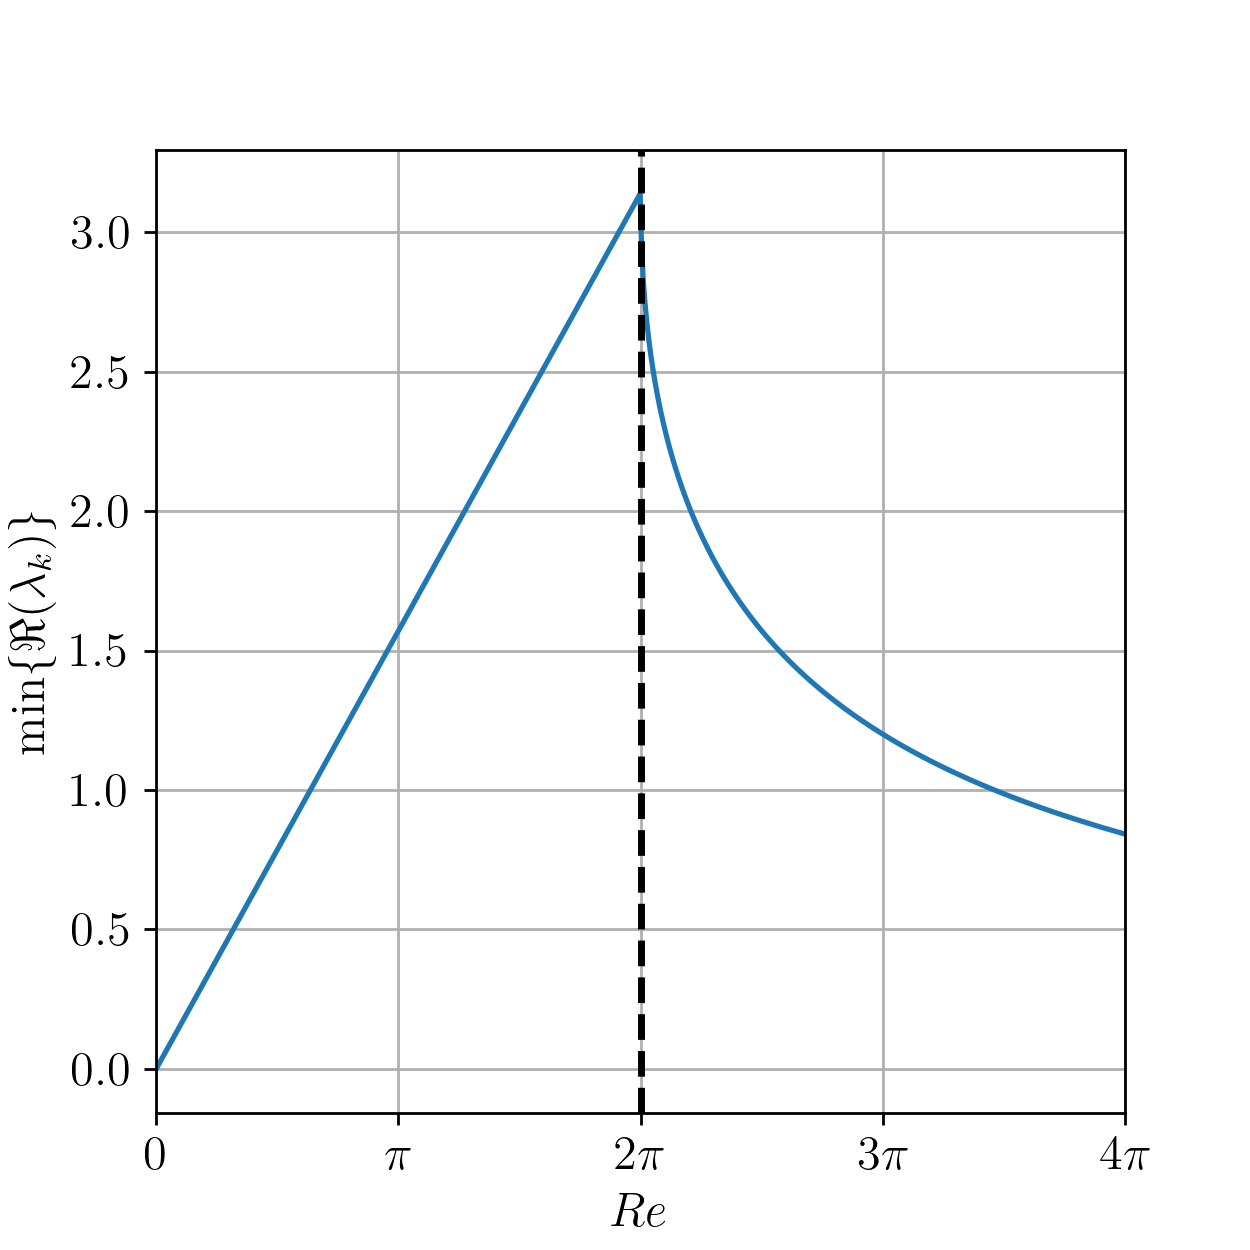

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.rcParams.update({"text.usetex": True, "font.size": 14})
f  = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(Re1,lam1)
ax.axvline(x=Re_opt.evalf(),ls='--',c='k',linewidth=2)
ax.set_xlabel("$Re$"); ax.set_ylabel("$\mathrm{min}\{\Re(\lambda_k)\}$")
ax.set_xticks([0,np.pi,2*np.pi,3*np.pi,4*np.pi])
ax.set_xticklabels(["$0$","$\pi$","$2\pi$","$3\pi$","$4\pi$"])
ax.set_xlim(0,4*np.pi)
ax.grid()